In [1]:
import numpy as np 
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#  Analysis Output(1) 

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [6]:
df.columns = new_columns

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
print("Dataset Shape : ",df.shape)

Dataset Shape :  (303, 14)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thal     303 non-null    int64  
 13  target   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Preparation for Exploratory Data Analysis(EDA)

# Examining the Missing Values

In [10]:
df.isnull()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

age        0
sex        0
cp         0
trtbps     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

In [12]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number,index = df.columns , columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

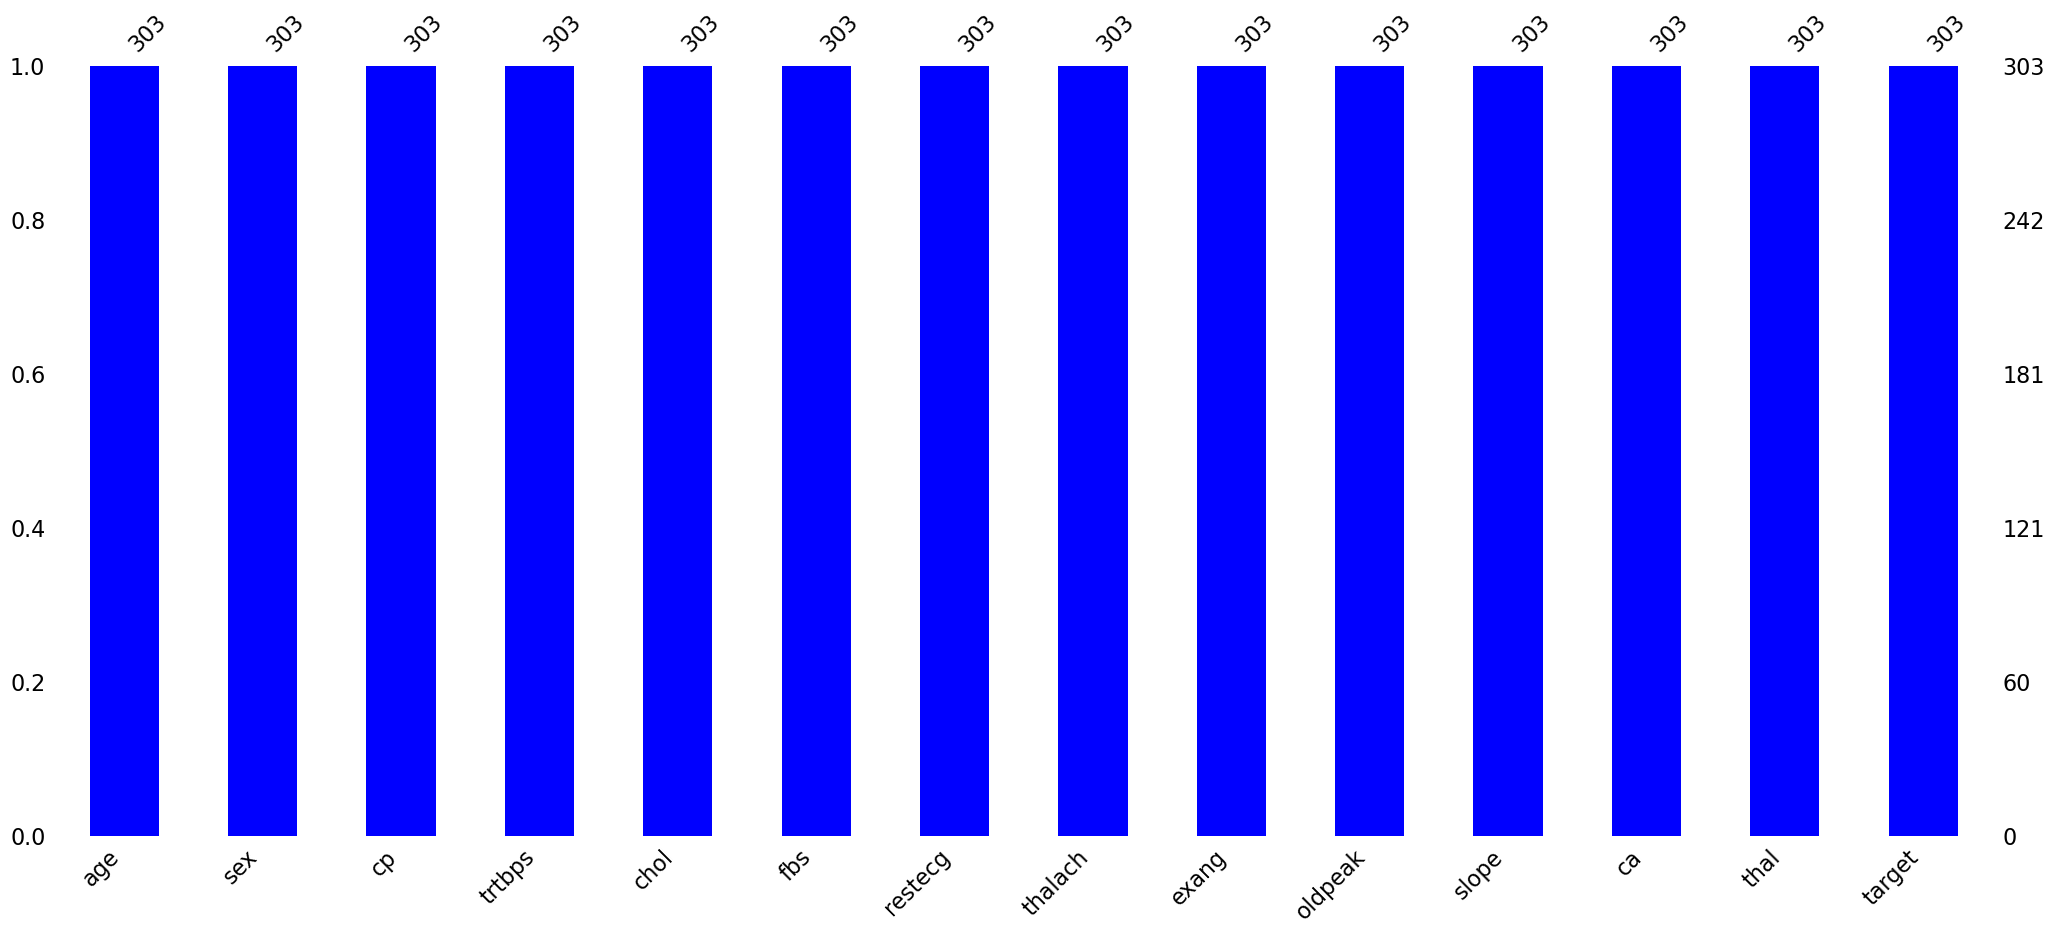

In [14]:
#Visually show data by "missingno" library
import missingno
missingno.bar(df,color="b")

# Examining the Unique Values 

In [15]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
df["cp"].value_counts().count()

4

In [18]:
df["cp"].value_counts().sum()

303

In [19]:
# Differentiate b/w Numerical and Categorical Values
unique_numbers = []
for i in df.columns:
    x=df[i].value_counts().count()
    unique_numbers.append(x)
pd.DataFrame(unique_numbers,index = df.columns,columns = ["Total Unique Numbers"])

,Total Unique Numbers
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


#  Analysis Output(2)

#  Seperating Variables (Numeric or Categorical)

In [20]:
numerical_var = ["age","trtbps","chol","thalach","oldpeak"]
categorical_var = ["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]

#  Examining the Statistics of Variables 

In [21]:
#Apply on Numerical Variable
df[numerical_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


<Axes: xlabel='age', ylabel='Density'>

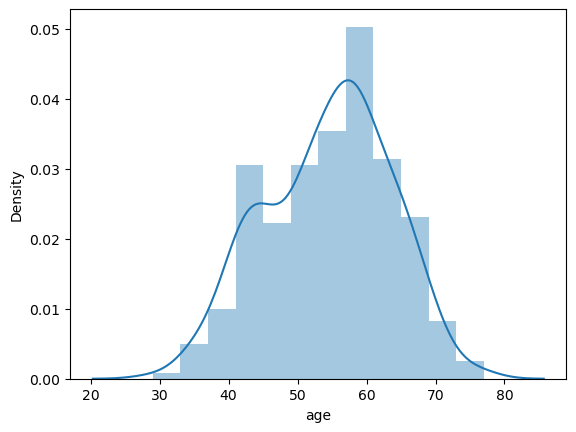

In [22]:
sns.distplot(df["age"])

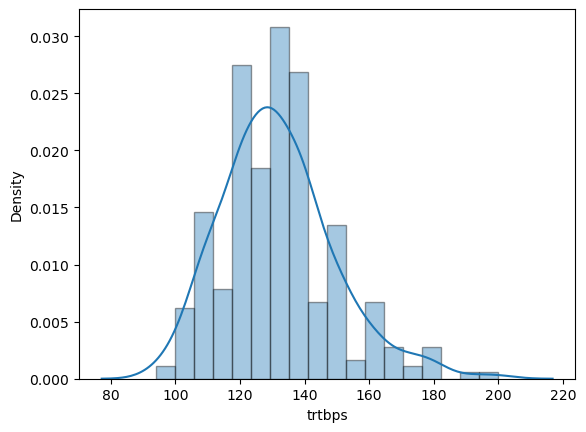

In [23]:
sns.distplot(df["trtbps"],hist_kws = dict(linewidth = 1 , edgecolor = "k"));

<Axes: xlabel='trtbps', ylabel='Density'>

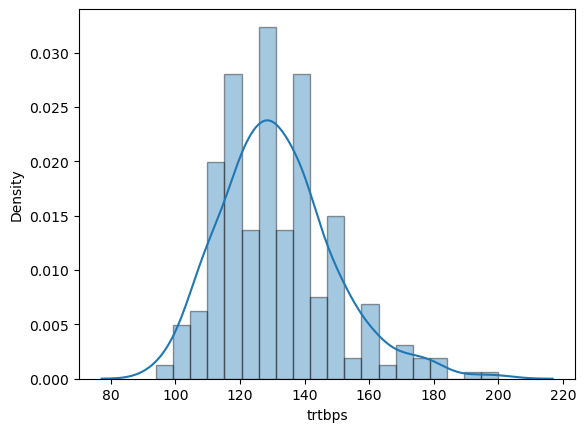

In [24]:
sns.distplot(df["trtbps"],hist_kws = dict(linewidth = 1 , edgecolor = "k"),bins=20)

<Axes: xlabel='chol', ylabel='Density'>

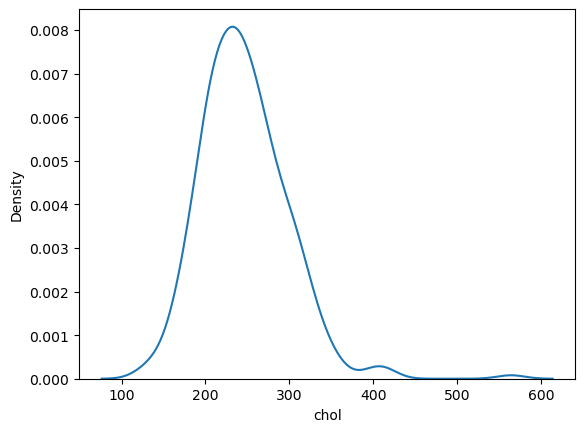

In [25]:
sns.distplot(df["chol"],hist= False)

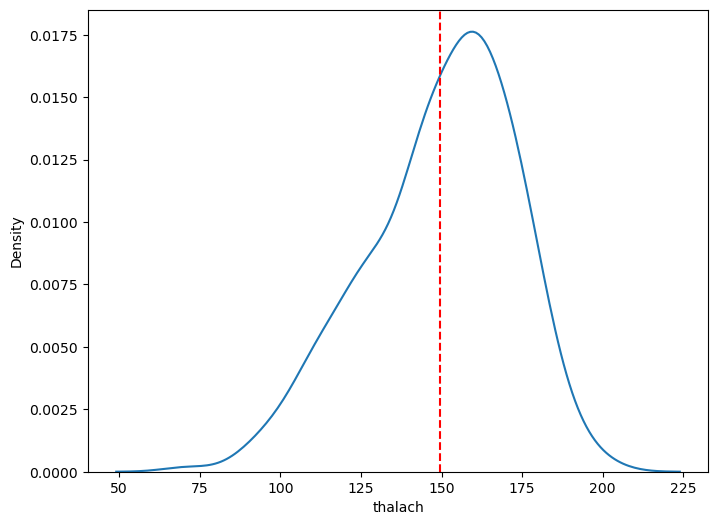

In [26]:
x , y = plt.subplots(figsize = (8,6))
sns.distplot(df["thalach"], hist = False , ax = y)
y.axvline(df["thalach"].mean(),color = "r", ls = "--")

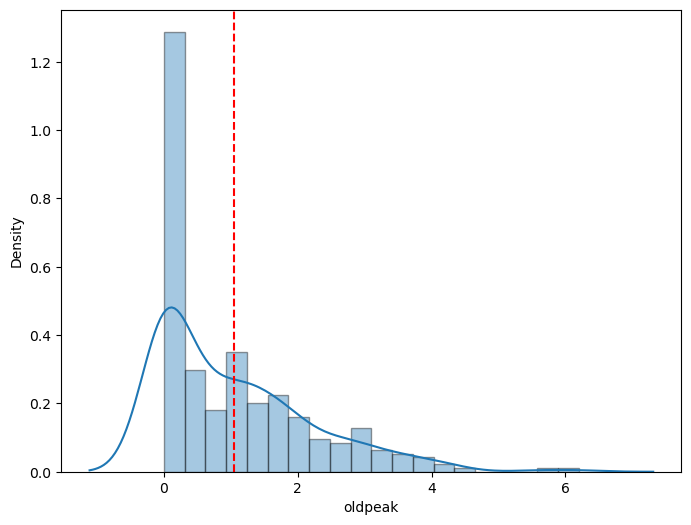

In [27]:
x , y = plt.subplots(figsize=(8,6))
sns.distplot(df["oldpeak"],hist_kws=dict(linewidth = 1,edgecolor="k"), bins = 20 , ax = y)
y.axvline(df["oldpeak"].mean(),color="r",ls="--")

#  Uni-Variate Analysis 
 Exploratory Data Analysis 
 Numerical Variables(Analysis with Distplot) 

In [28]:
numerical_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

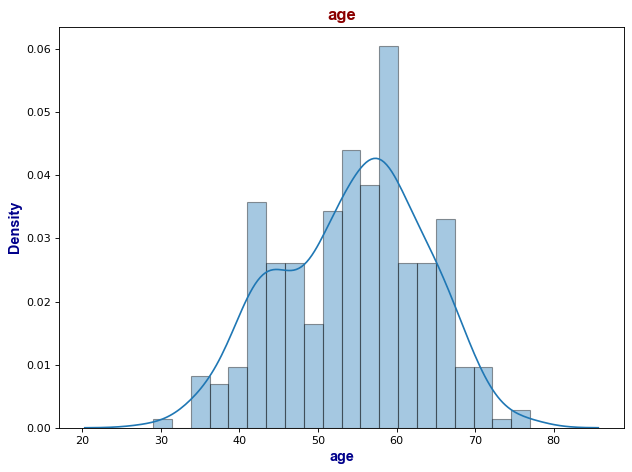

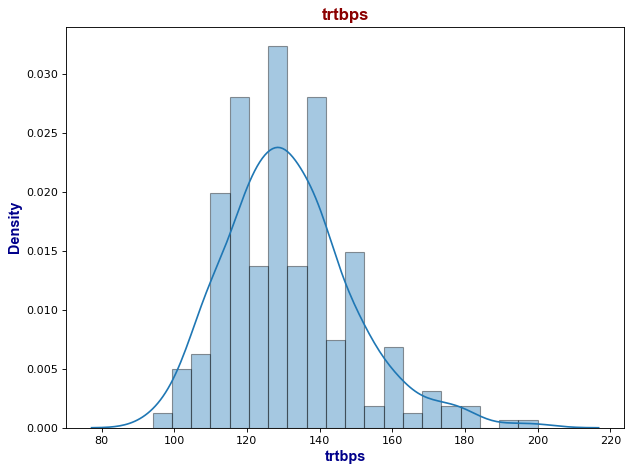

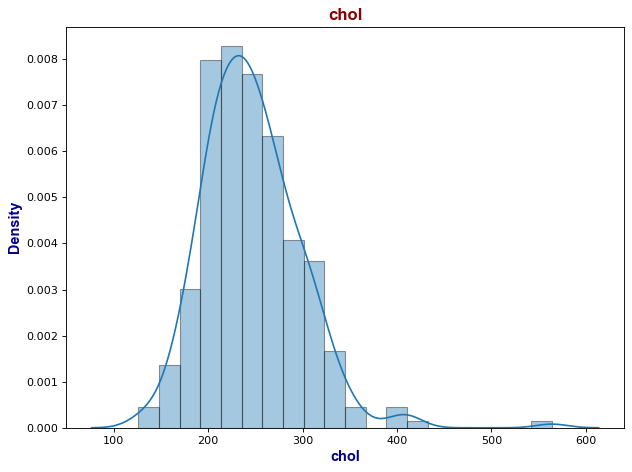

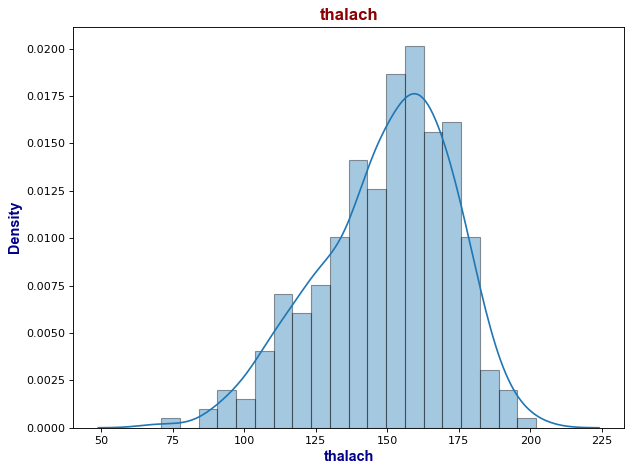

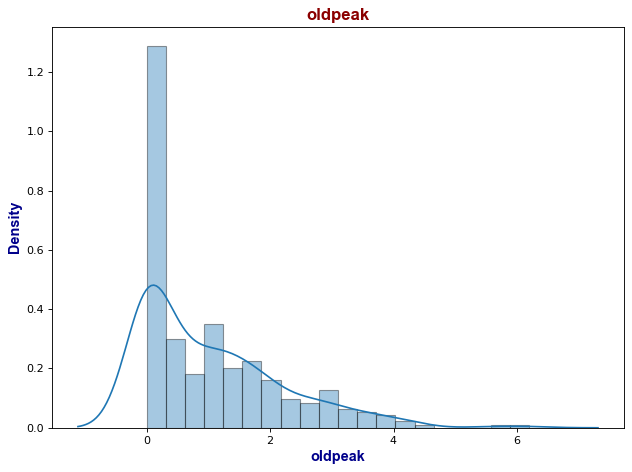

In [29]:
title_font = {"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font = {'family':'arial' , 'color' : 'darkblue' , 'weight' : 'bold' , 'size' : 13}
for i in numerical_var:
    plt.figure(figsize=(8,6),dpi=80)
    sns.distplot(df[i],hist_kws=dict(linewidth=1 , edgecolor="k"), bins = 20)
    
    plt.title(i , fontdict = title_font)
    plt.xlabel(i , fontdict = axis_font)
    plt.ylabel("Density", fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()

In [30]:
numerical_axis_name = ["Age of the Patient" , "Resting Blood Pressure","Cholestrol","Maximum Heart Rate Achieved","ST Depression"]

In [31]:
list(zip(numerical_var,numerical_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholestrol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

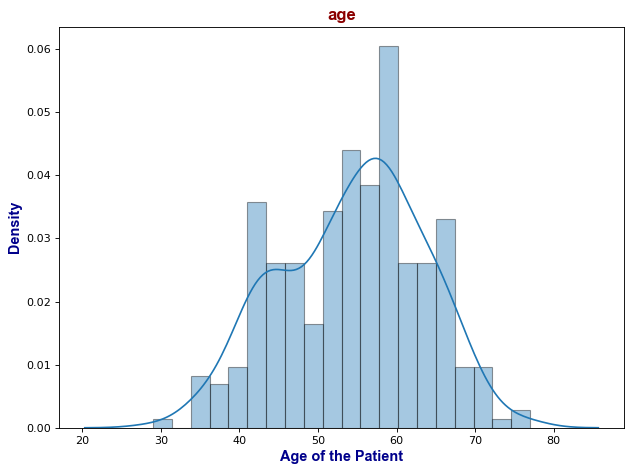

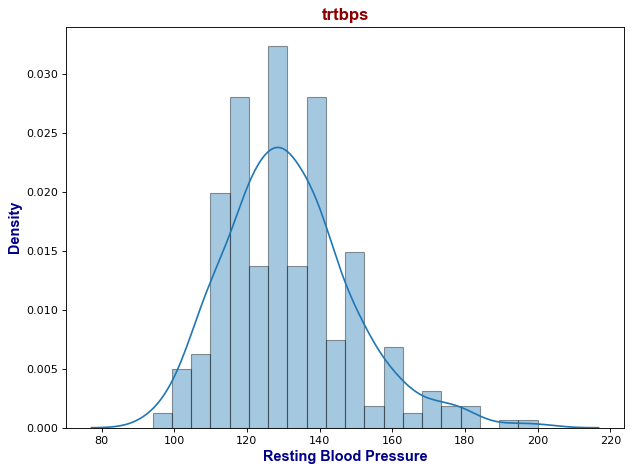

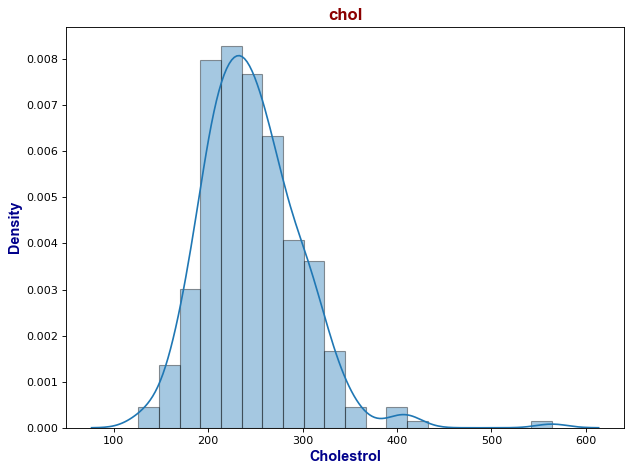

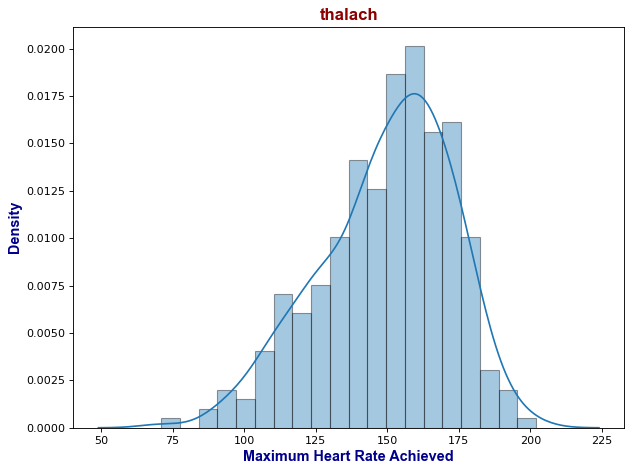

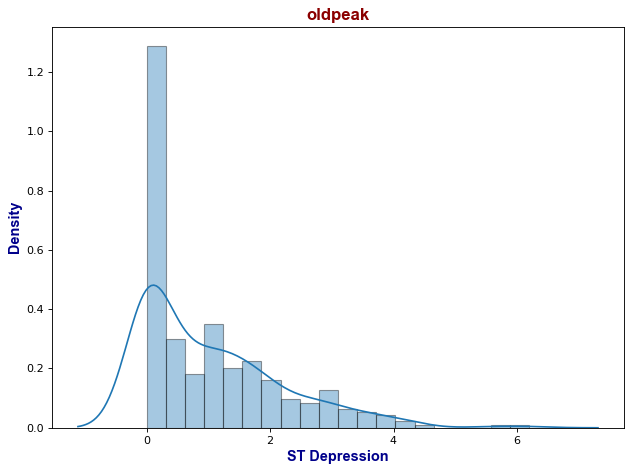

In [32]:
title_font = {'family':'arial','color':'darkred','weight':'bold','size':15}
axis_font = {'family':'arial','color':'darkblue','weight':'bold','size':13}
for i,z in list(zip(numerical_var,numerical_axis_name)):
    plt.figure(figsize = (8,6) , dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth=1,edgecolor="k"), bins = 20)
    
    plt.title(i , fontdict= title_font)
    plt.xlabel(z , fontdict= axis_font)
    plt.ylabel("Density" , fontdict= axis_font)
    
    plt.tight_layout()
    plt.show()

#  Analysis Output(4) 

4.1.2 Categorical Variables (Analysis with Piechart) 

In [33]:
categorical_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [34]:
 categorical_axis_name = ['Gender' , 'Chest Pain Type' ,' Fasting Bloodpressure' , 'Resting Electrocardiographic Results' , 'Exercise Induced Angina' , 'Slope of ST Segment' , 'Number of Major Vessels ', 'Thal' , 'Target' ]

In [35]:
list(zip(categorical_var,categorical_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', ' Fasting Bloodpressure'),
 ('restecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'Slope of ST Segment'),
 ('ca', 'Number of Major Vessels '),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [36]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [37]:
df["cp"].value_counts().sum()

303

In [38]:
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [39]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

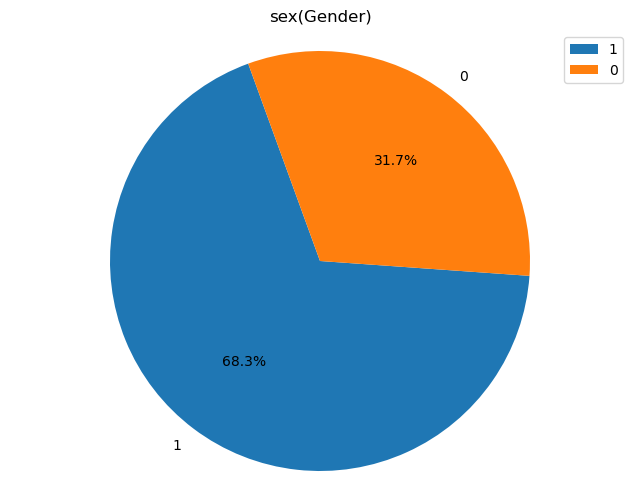

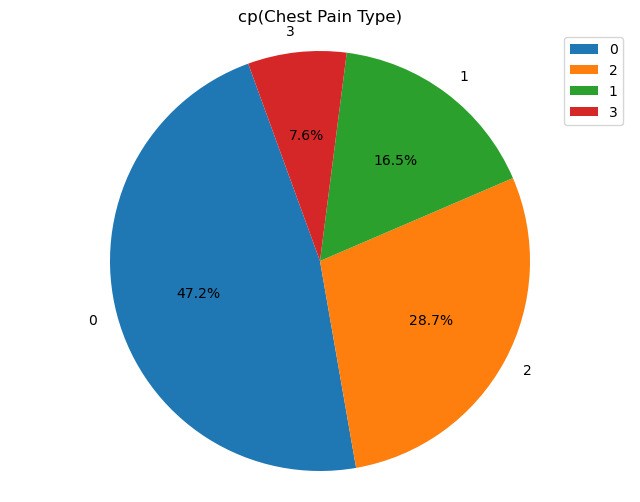

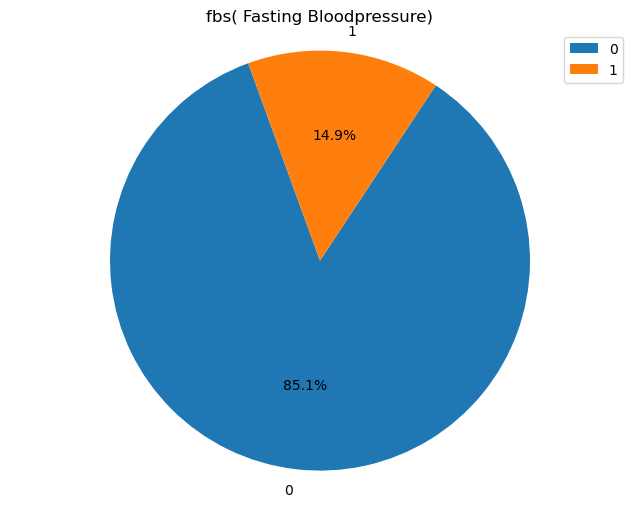

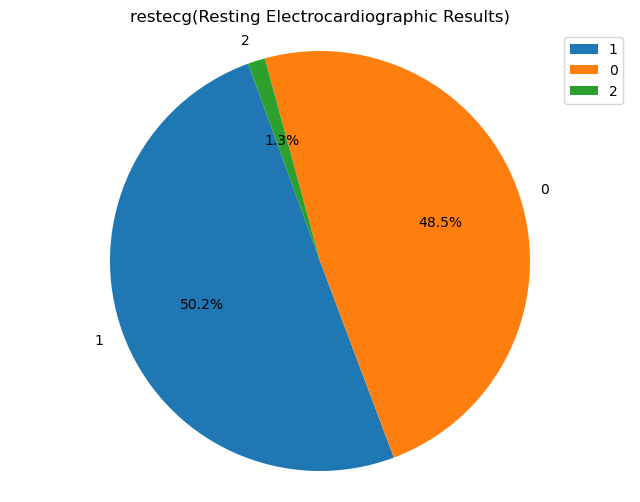

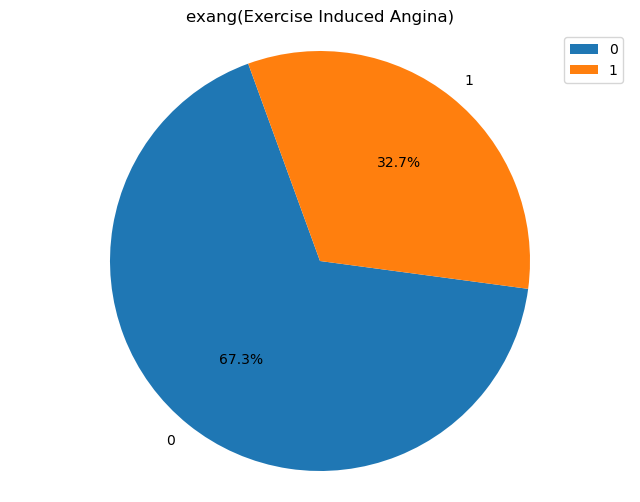

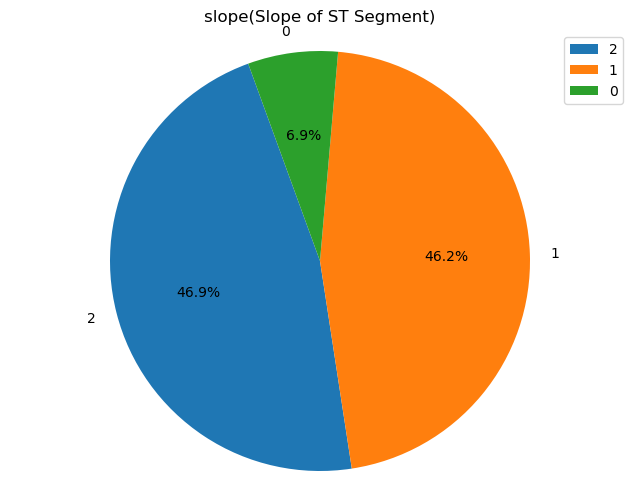

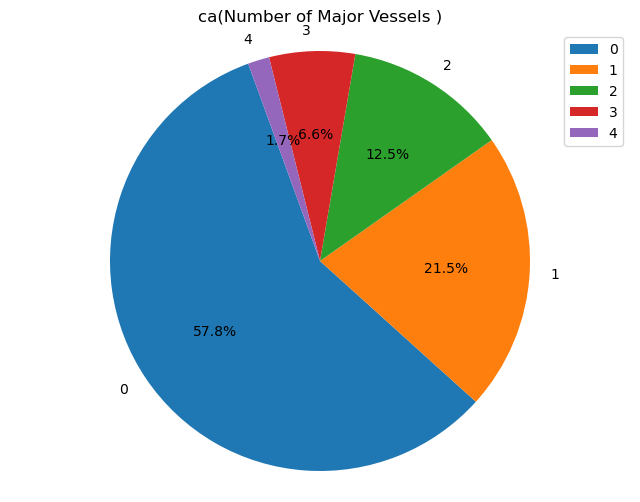

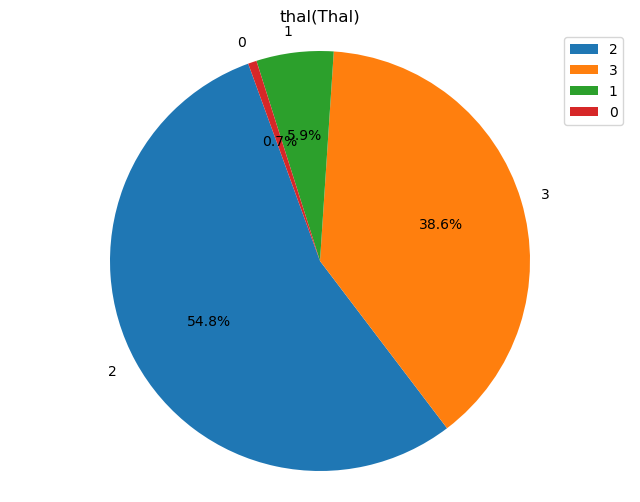

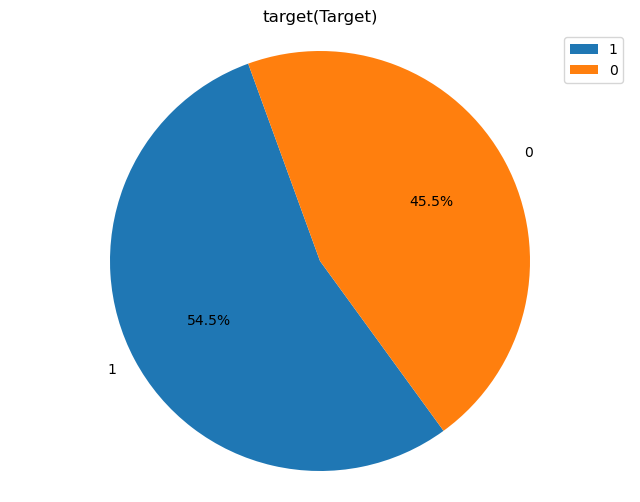

In [40]:
label_font = {'family':'arial' , 'color' : 'darkred' , 'weight' : 'bold' , 'size' : 15}
axis_font = {'family':'arial' , 'color' : 'darkblue' , 'weight' : 'bold' , 'size' : 13}

for i , z in list(zip(categorical_var,categorical_axis_name)):
    fig , ax = plt.subplots(figsize=(8,6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values,labels=observation_values, autopct="%1.1f%%",startangle=110,labeldistance=1.1)
    ax.axis("equal")
    
    plt.title(i + "(" + z + ")")
    plt.legend()
    plt.show()

# Examining the Missing Data According to the Analysis Result

In [41]:
# 3 Obsn Values in "Thal" variabel , 4th variable is null(0) . Discarding missing values and replace them with meaningful Data
df[df["thal"]==0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [42]:
df["thal"].replace(0,np.nan)

0      1.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
298    3.0
299    3.0
300    3.0
301    3.0
302    2.0
Name: thal, Length: 303, dtype: float64

In [43]:
df["thal"] = df["thal"].replace(0,np.nan)

In [44]:
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [45]:
isnull_number = []
for i in df.columns:
    x=df[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number,index=df.columns,columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [46]:
# Filling Null Variable
df["thal"].fillna(2,inplace=True)

In [47]:
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [48]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3.0,0


In [49]:
# Convert all values in Thal from float to integer type
df["thal"]= pd.to_numeric(df["thal"],downcast="integer")

In [50]:
df.loc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [51]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number,index=df.columns,columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [52]:
# No missing values
df["thal"].value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

#  Bi-Variate Analysis 

4.2.1 Numerical Variables - Target Variables ( Analysis with FacetGrid)

In [53]:
numerical_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [54]:
numerical_var.append("target")

In [55]:
numerical_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

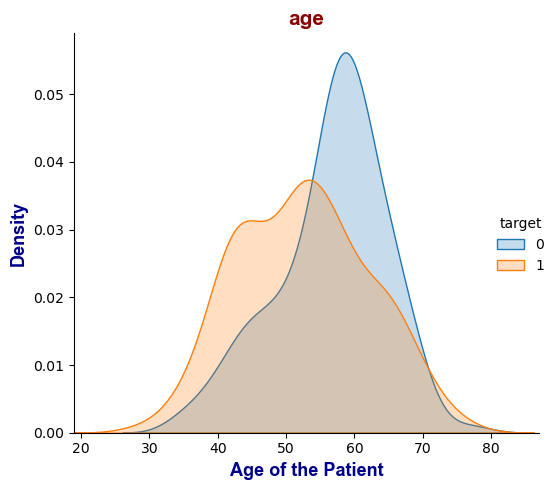

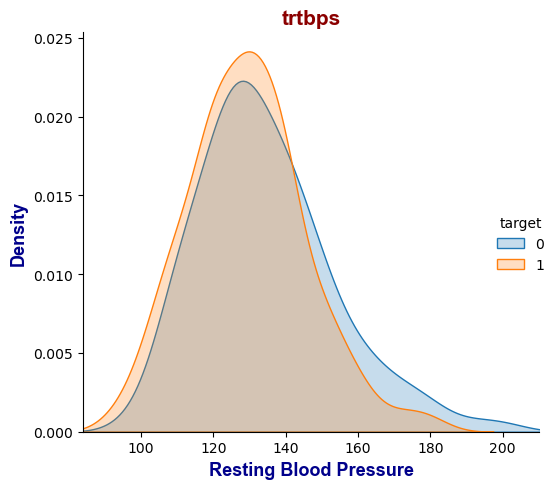

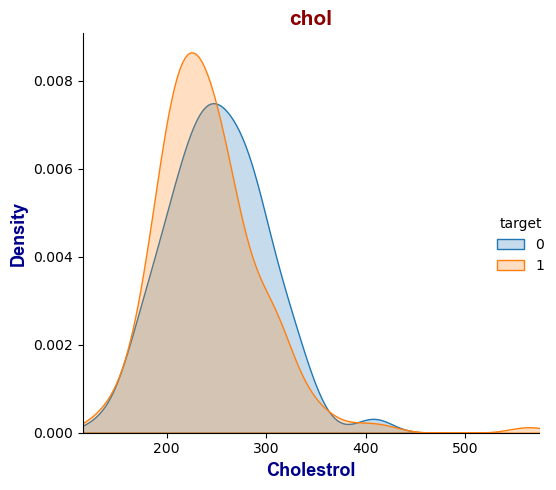

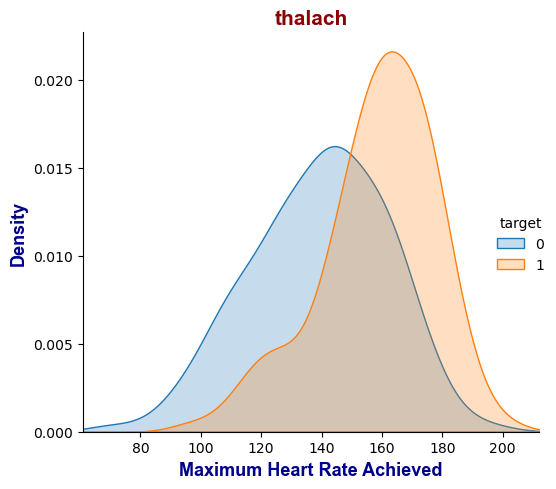

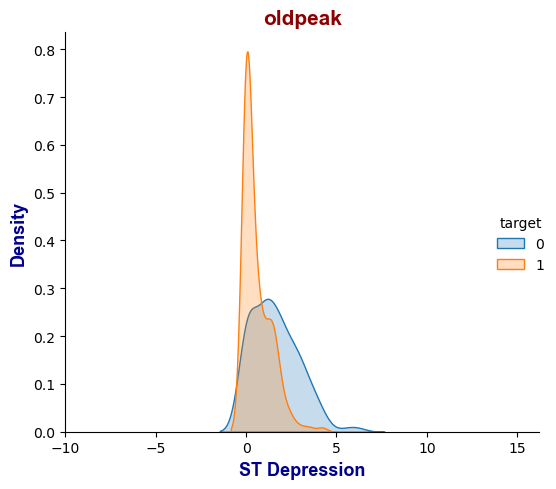

In [56]:
label_font = {'family':'arial','color':'darkred','weight':'bold','size':15}
axis_font = {'family':'arial','color':'darkblue','weight':'bold','size':13}

for i , z in list(zip(numerical_var,numerical_axis_name)):
    graph = sns.FacetGrid(df[numerical_var],hue="target",height=5,xlim = ((df[i].min()-10) ,( df[i].max()+10)))
    graph.map(sns.kdeplot,i,shade=True)
    graph.add_legend()
    
    plt.title(i , fontdict=label_font)
    plt.xlabel(z , fontdict=axis_font)
    plt.ylabel("Density",fontdict=axis_font)
    plt.tight_layout()
    plt.show()

In [57]:
df[numerical_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [58]:
df[numerical_var].corr().iloc[:,[-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


In [59]:
categorical_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

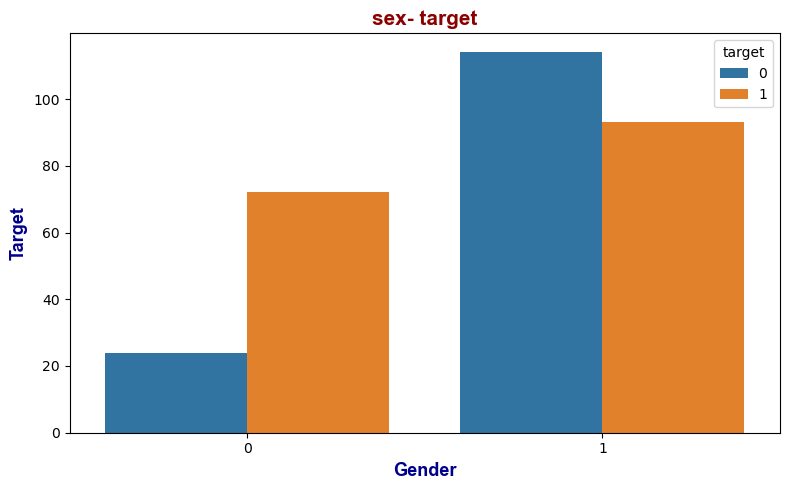

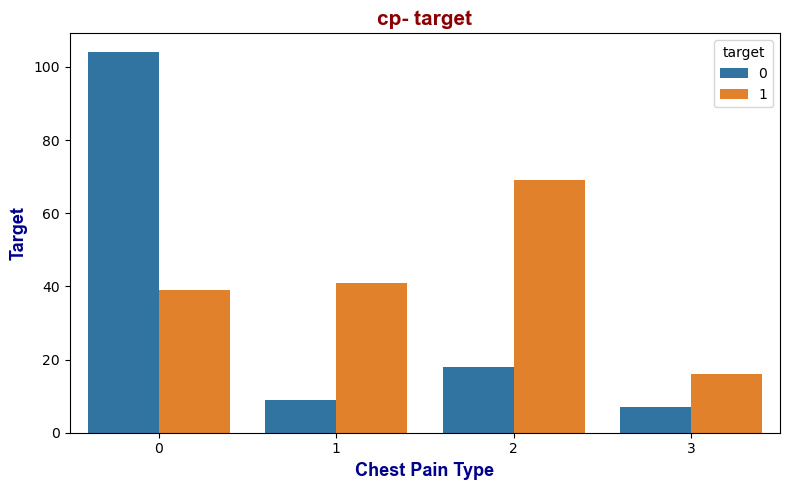

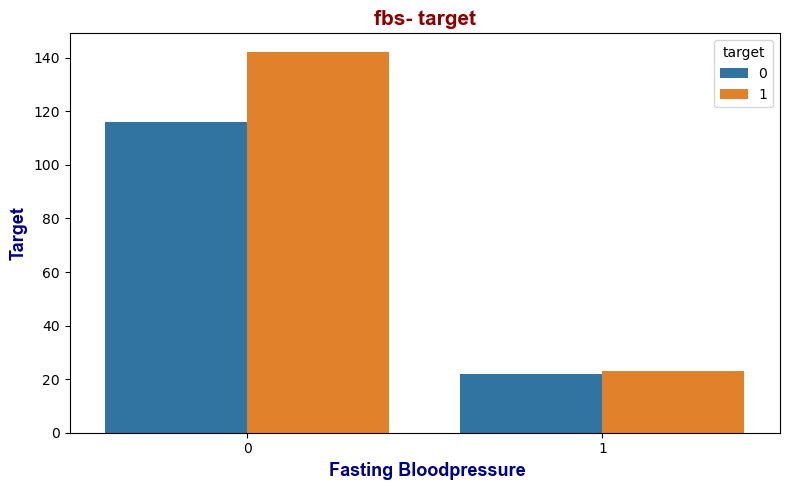

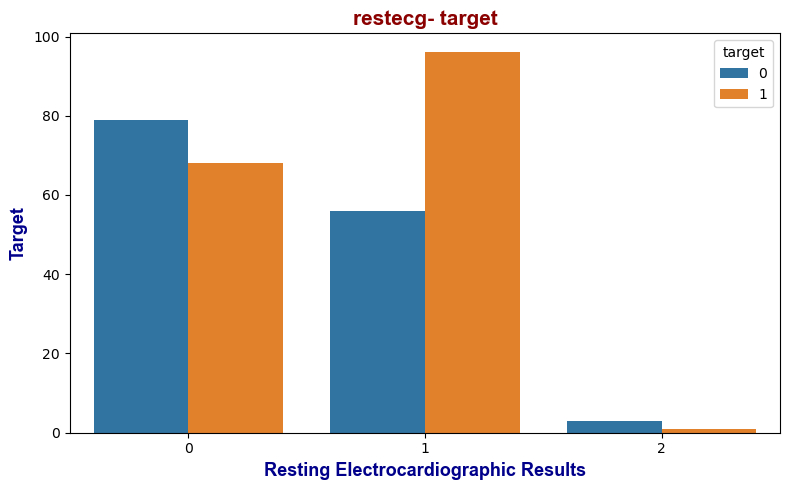

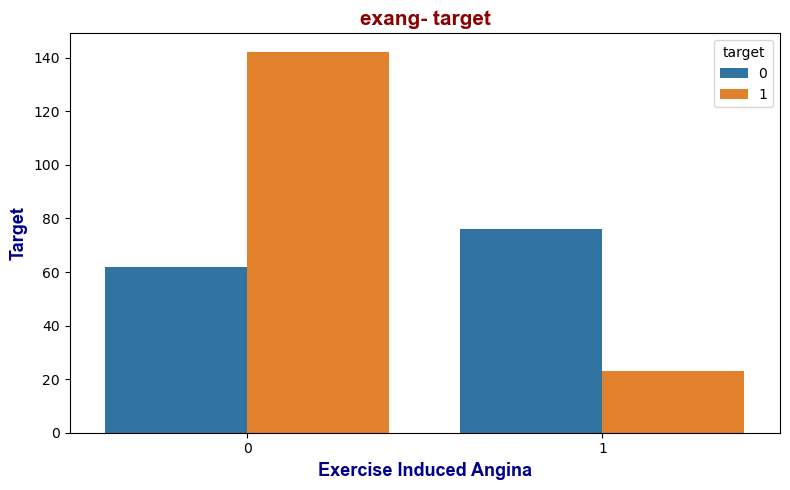

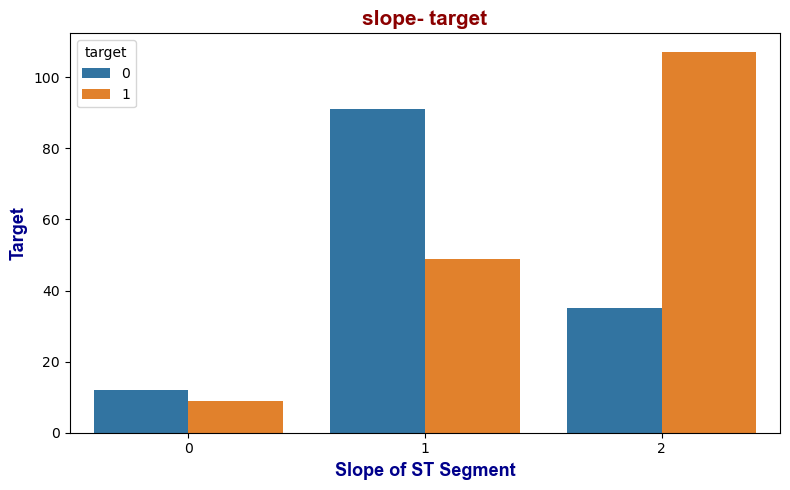

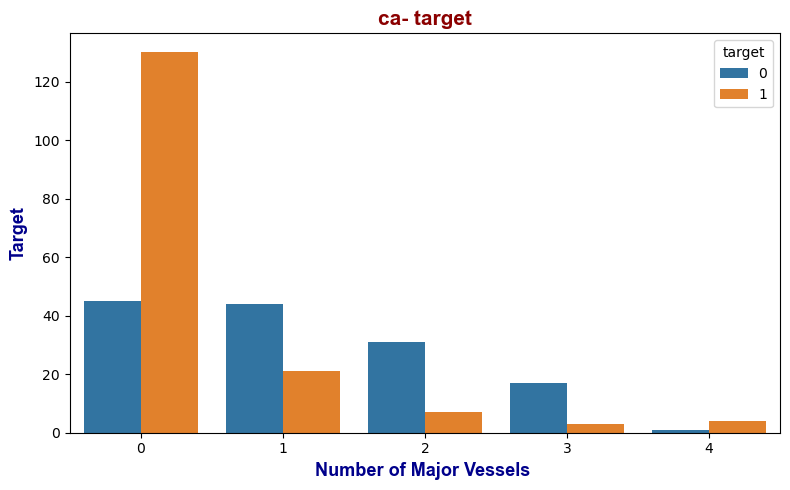

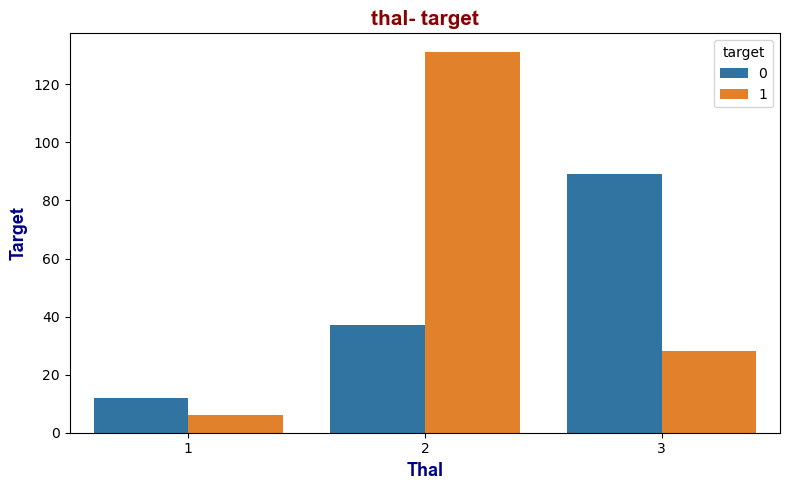

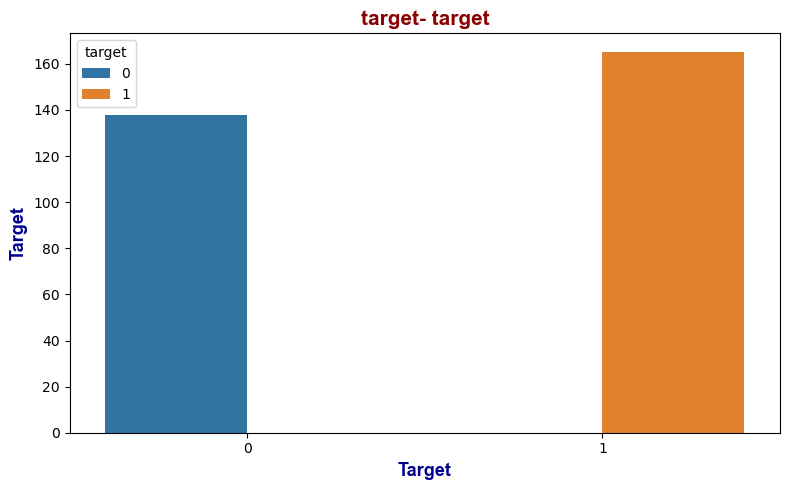

In [60]:
label_font = {'family':'arial' , 'color':'darkred' , 'weight' : 'bold' , 'size' : 15}
axis_font = {'family':'arial' , 'color':'darkblue' , 'weight' : 'bold' , 'size' : 13}

for i ,z in list(zip(categorical_var,categorical_axis_name)):
    plt.figure(figsize=(8,5))
    sns.countplot(x= i , data = df[categorical_var], hue = "target")
    
    plt.title(i + "- target",fontdict=label_font)
    plt.xlabel(z,fontdict=axis_font)
    plt.ylabel("Target",fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()

In [61]:
df[categorical_var].corr()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
restecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [62]:
df[categorical_var].corr().iloc[:,[-1]]
# cp and exang has the most corelation (Moderate Correlation) . fbs has least corelation

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
restecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


In [63]:
numerical_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [64]:
numerical_var.remove("target")

In [65]:
numerical_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

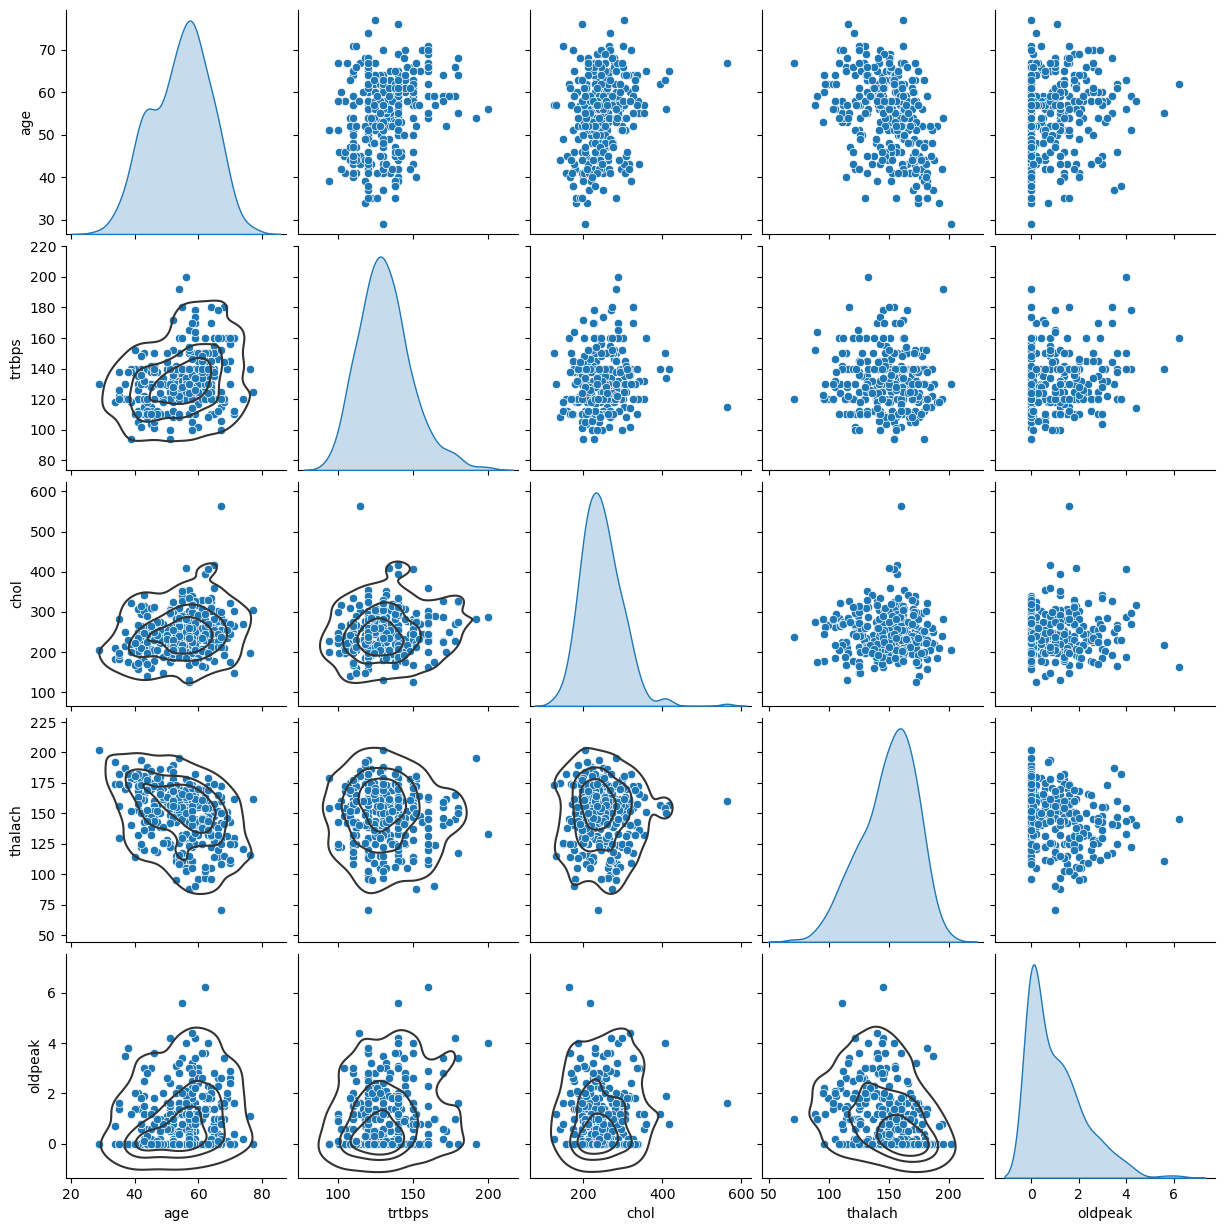

In [66]:
graph = sns.pairplot(df[numerical_var],diag_kind="kde")
graph.map_lower(sns.kdeplot,levels=4,color=".2")
plt.show()

# Feature Scaling with Robust Scaler Method

In [67]:
from sklearn.preprocessing import RobustScaler

In [68]:
robust_scaler = RobustScaler()

In [69]:
scaled_data = robust_scaler.fit_transform(df[numerical_var])

In [70]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [71]:
df_scaled = pd.DataFrame(data=scaled_data,columns=numerical_var)

In [72]:
df_scaled.head()
# Distance b/w Data are scaled to certain range by preserving their weights so structure of data is not destroyed

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


# Creating a New DataFrame with Melt() function

In [73]:
df_new = pd.concat([df_scaled,df.loc[:,"target"]],axis=1)

In [74]:
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [75]:
melted_data = pd.melt(df_new ,id_vars="target",var_name="variables",value_name="value")

In [76]:
melted_data.head()

,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148


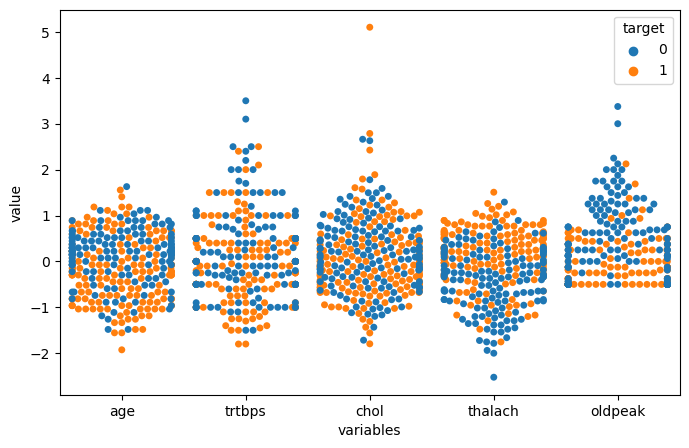

In [77]:
# Create prototype graphic by swarmplot
plt.figure(figsize=(8,5))
sns.swarmplot(x="variables",y="value",hue="target",data=melted_data)
plt.show()
# Variables with best correlations are thalach and oldpeak variables. At threshold of 0 , 30% misdetermination . Colors are mixed

# Numerical Varibles - Categorical Variables (Analysis with swarmplot)

# Categorical Variabels - Numerical Variables (Analysis with Boxplot)

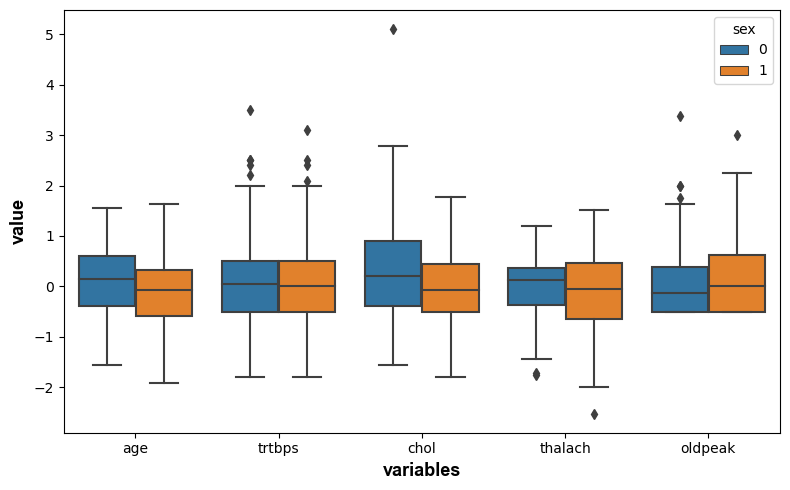

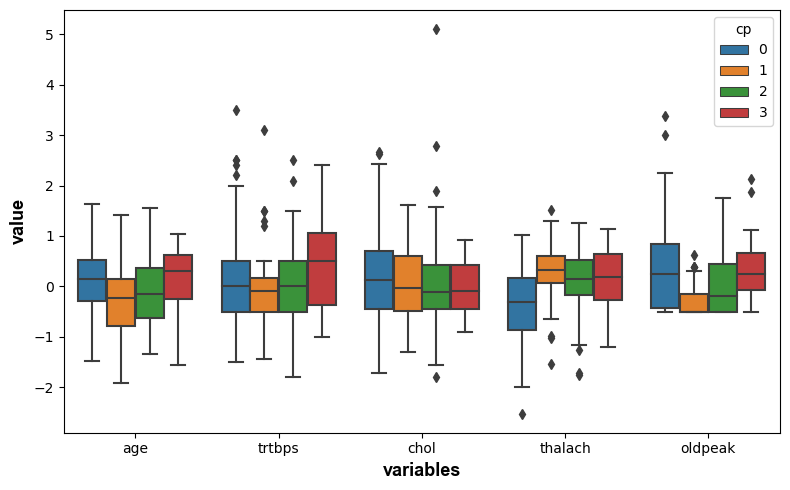

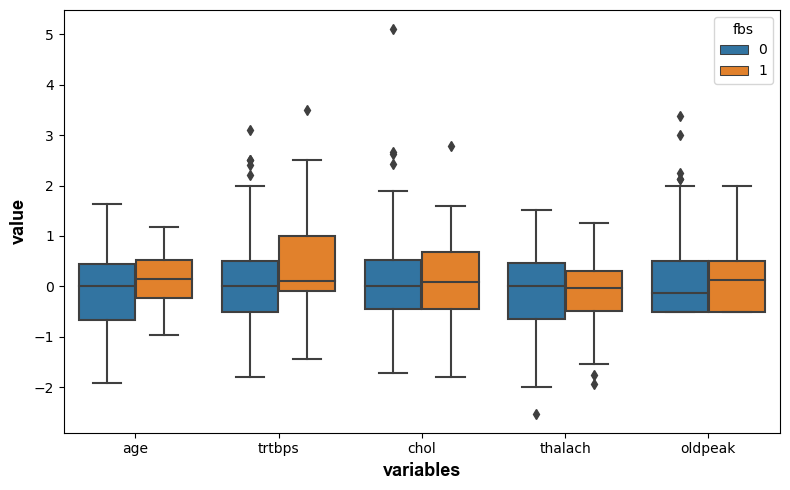

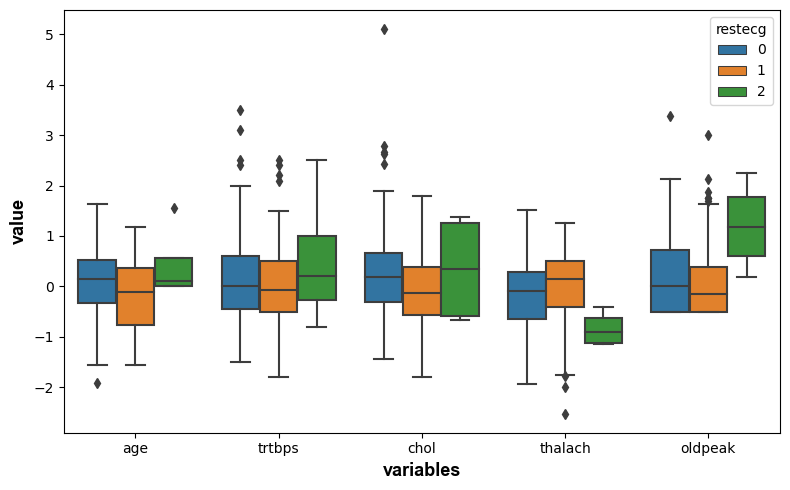

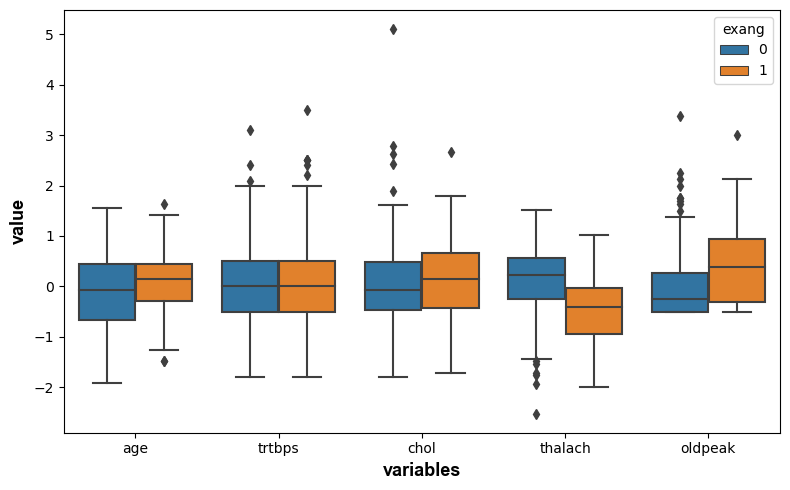

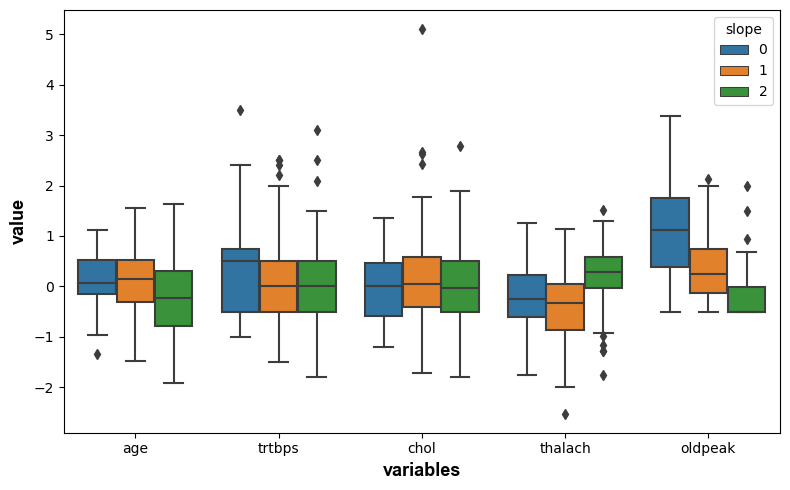

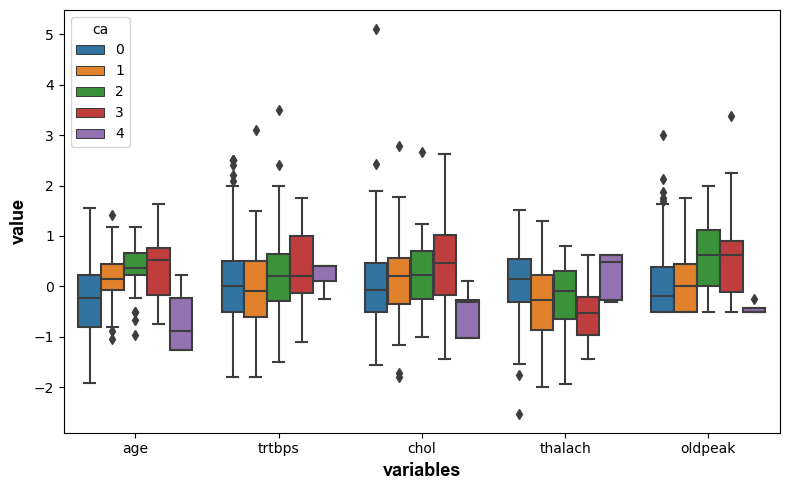

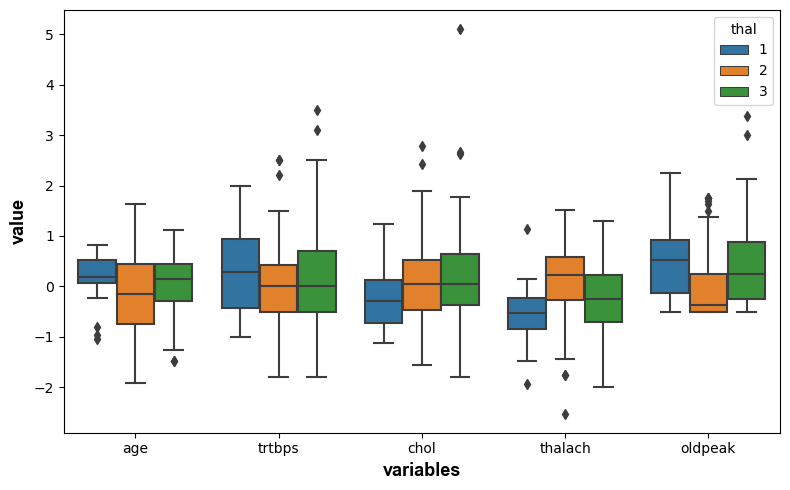

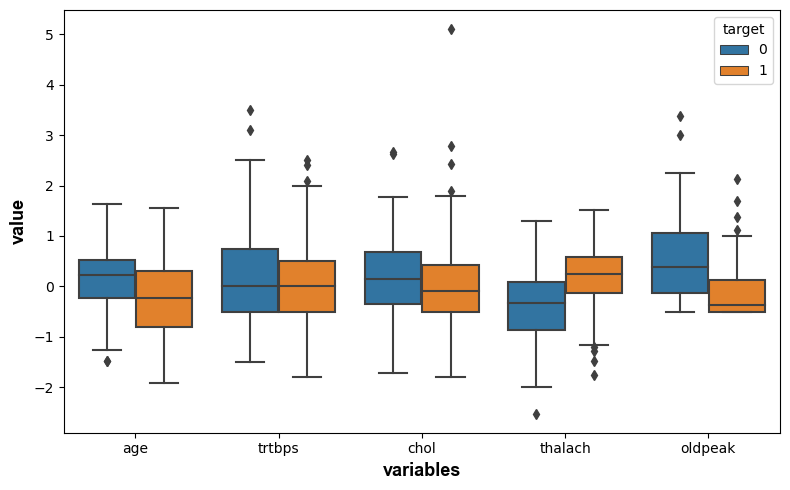

In [78]:
axis_font = {'family':'arial','color':'black','weight':'bold','size':13}

for i in df[categorical_var]:
    df_new = pd.concat([df_scaled,df.loc[:,i]],axis=1)
    
    melted_data = pd.melt(df_new,id_vars=i,var_name="variables",value_name="value")
    
    plt.figure(figsize=(8,5))
    sns.boxplot(data=melted_data,x="variables",y="value",hue=i)
    
    plt.xlabel("variables",fontdict=axis_font)
    plt.ylabel("value",fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()
    

# Relationship between variables (Analysis with Heatmap)

In [79]:
df_scaled

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [80]:
df_new2 = pd.concat([df_scaled,df[categorical_var]],axis=1)

In [81]:
df_new2

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


<Axes: >

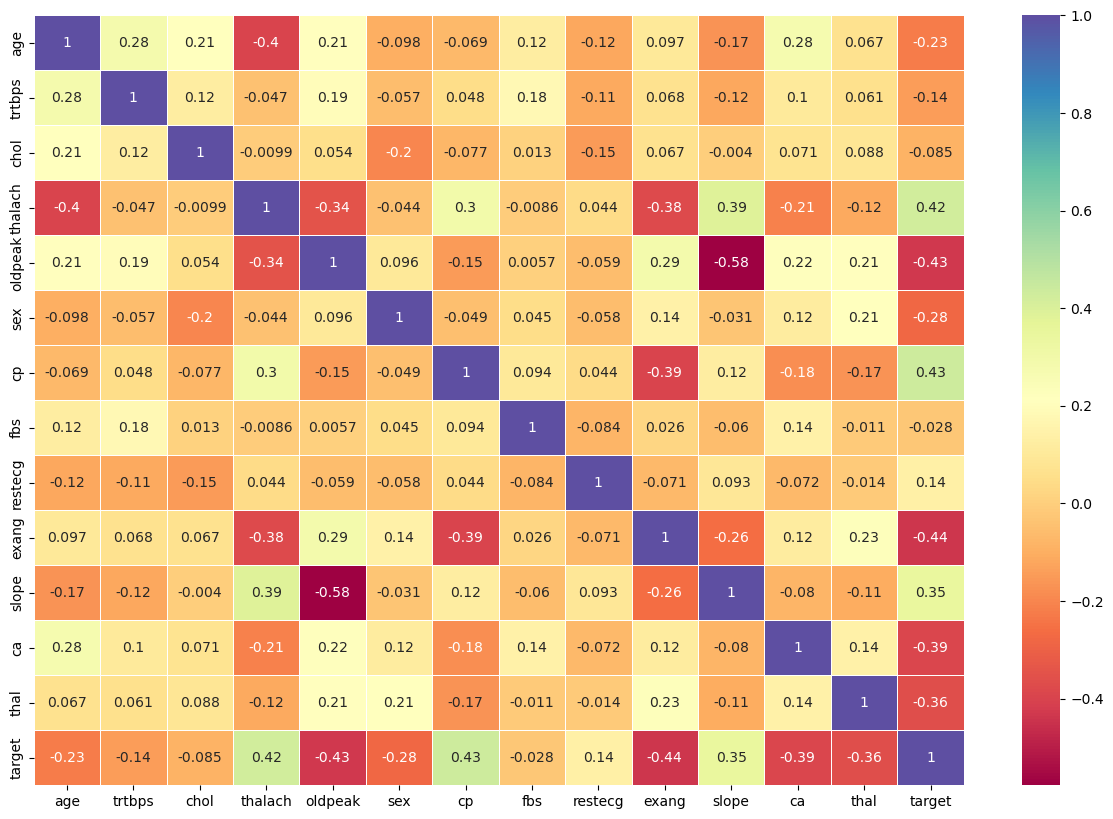

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new2.corr(),annot=True,cmap="Spectral",linewidths=0.5)

In [83]:
df_new2.corr()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
restecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


# Preparation for Modelling

# Dropping Columns with Low Correlation

In [84]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
df.drop(["fbs","restecg","chol"],axis=1,inplace=True)

In [86]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


# Struggling Outliers
Visualizing Outliers

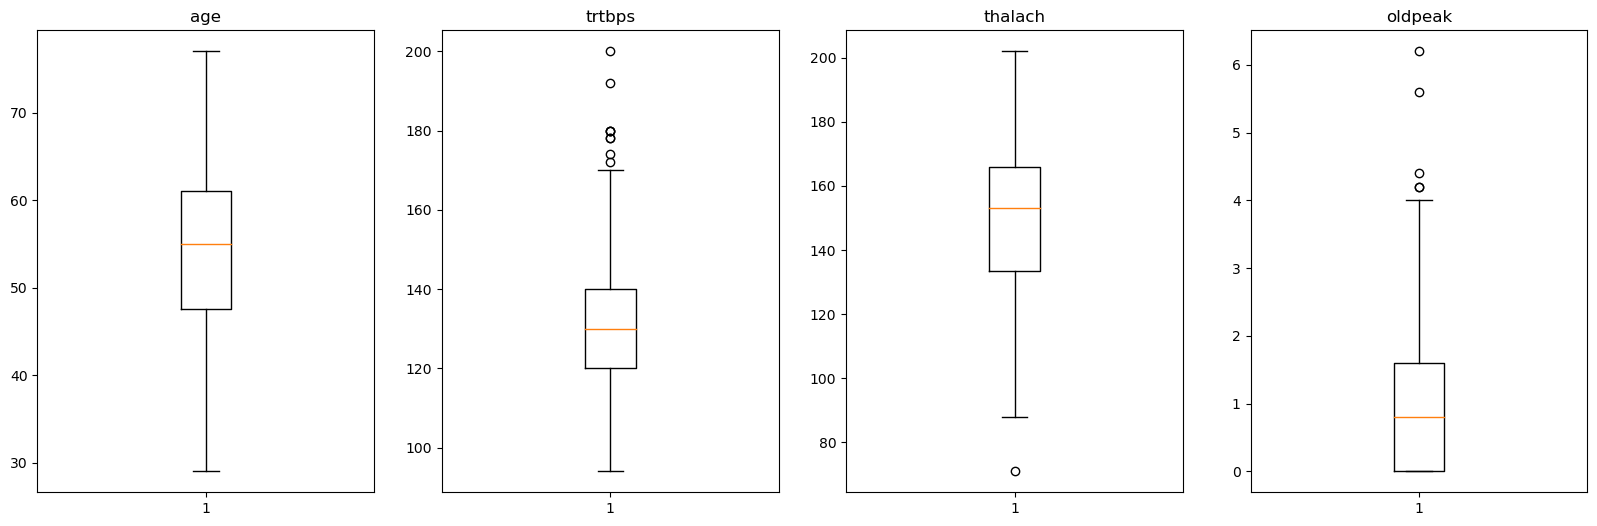

In [87]:
fig , (ax1 , ax2 , ax3 , ax4) = plt.subplots(1,4,figsize=(20,6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

# Dealing with Outliers
 Trtbps Variables

In [88]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [89]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1,4):
    print("Threshold Values : {}".format("threshold"))
    print("Number of Outliers : {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("------------------")

Threshold Values : threshold
Number of Outliers : 51
------------------
Threshold Values : threshold
Number of Outliers : 13
------------------
Threshold Values : threshold
Number of Outliers : 2
------------------


In [90]:
df[z_scores_trtbps > 2][["trtbps"]]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [91]:
df[z_scores_trtbps > 2].trtbps.min()

170

In [92]:
df[df["trtbps"]<170].trtbps.max()

165

In [93]:
winsorize_percentile_trtbps = stats.percentileofscore(df["trtbps"],165) / 100

In [94]:
print(winsorize_percentile_trtbps)

0.957095709570957


In [95]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [96]:
trtbps_winsorize = winsorize(df.trtbps,(0,(1-winsorize_percentile_trtbps)))

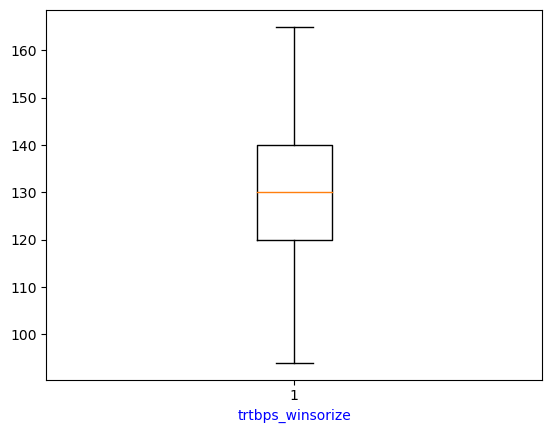

In [97]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize",color="b")
plt.show()

In [98]:
df["trtbps_winsorize"] = trtbps_winsorize

In [99]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


# Thalach Variable

In [100]:
def iqr(df,var):
    q1 = np.quantile(df[var],0.25)
    q3 = np.quantile(df[var],0.75)
    diff = q3-q1
    lower_v = q1-(1.5*diff)
    upper_v = q3+(1.5*diff)
    return df[(df[var]<lower_v)|(df[var]>upper_v)]

In [101]:
thalach_out = iqr(df,"thalach")

In [102]:
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [103]:
df.drop([272],axis=0,inplace=True)

In [104]:
df["thalach"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x24f50449300>,
 'caps': [<matplotlib.lines.Line2D at 0x24f504497e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f50531420>],
 'medians': [<matplotlib.lines.Line2D at 0x24f5044aad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f50448190>],
 'means': []}

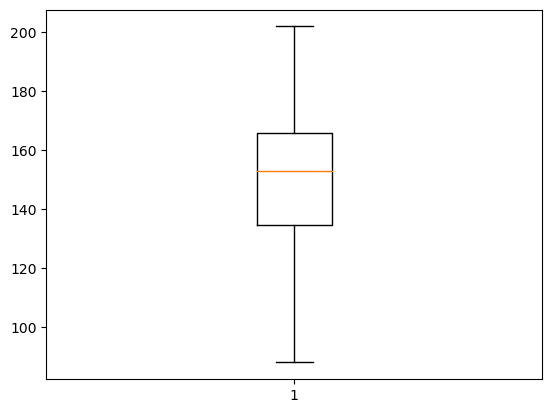

In [105]:
plt.boxplot(df["thalach"])

# Oldpeak Variable

In [106]:
def iqr(df,var):
    q1 = np.quantile(df[var],0.25)
    q3 = np.quantile(df[var],0.75)
    diff = q3-q1
    lower_v =q1 - (1.5*diff)
    upper_v =q3 + (1.5*diff)
    return df[(df[var]<lower_v)|(df[var]>upper_v)]

In [107]:
iqr(df,"oldpeak")

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [108]:
# Donot remove the dataset and reduce the amount of Data. Apply winsorize method
df[df["oldpeak"]<4.2].oldpeak.max()

4.0

In [109]:
winsorize_perrcentile_oldpeak = (stats.percentileofscore(df["oldpeak"],4)) / 100
print(winsorize_perrcentile_oldpeak)

0.980132450331126


In [110]:
oldpeak_wonsorize = winsorize(df.oldpeak,(0,(1-winsorize_perrcentile_oldpeak)))

In [111]:
df["oldpeak_winsorize"] = oldpeak_wonsorize

In [112]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [113]:
df.drop(["trtbps","oldpeak"],axis=1,inplace=True)

In [114]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


# Determining Distribution of Numerical Variables

In [115]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


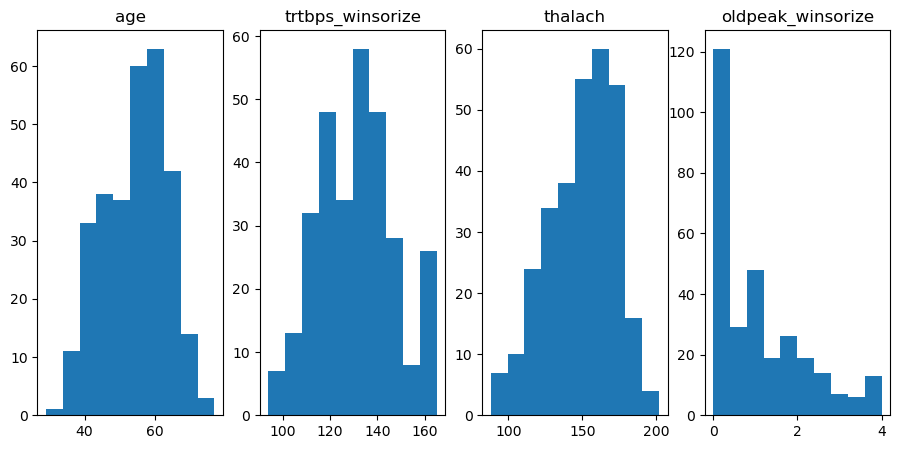

In [116]:
fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(11,5))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [117]:
# Find the skewedness of Data
df[["age","trtbps_winsorize","thalach","oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


# Transformation Operations on Unsymmetrical Data

In [118]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [119]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [120]:
df[["oldpeak_winsorize","oldpeak_winsorize_log","oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [121]:
df.drop(["oldpeak_winsorize","oldpeak_winsorize_log"],axis=1,inplace=True)

In [122]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597



# Applying One Hot Encoding Method to Categorical Variables

In [123]:
df_copy = df.copy()

In [124]:
df_copy.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [125]:
categorical_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [126]:
categorical_var.remove("fbs")
categorical_var.remove("restecg")


In [127]:
categorical_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [128]:
df_copy = pd.get_dummies(df_copy,columns=categorical_var[:-1],drop_first=True)

In [129]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0


# Feature Scaling with the Robust Scaler Method for Machine Learning Alogrithm

In [130]:
numerical_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [131]:
new_numeric_var = ["age","thalach","trtbps_winsorize","oldpeak_winsorize_sqrt"]

In [132]:
robust_scaler = RobustScaler()

In [133]:
df[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

In [134]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0


# Seperating Data into Test and Training Set

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X = df_copy.drop(["target"],axis=1)
y = df_copy[["target"]]

In [137]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=3)

In [138]:
X_train.head()

,age,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
201,60,141,125,1.673320,1,0,0,0,1,1,0,1,0,0,0,0,1
82,60,160,102,0.000000,0,0,1,0,0,0,1,1,0,0,0,1,0
187,54,109,124,1.483240,1,0,0,0,1,1,0,1,0,0,0,0,1
259,38,182,120,1.949359,1,0,0,1,1,1,0,0,0,0,0,0,1
5,57,148,140,0.632456,1,0,0,0,0,1,0,0,0,0,0,0,0


In [139]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [140]:
print(f"X_train : {X_train.shape[0]}")
print(f"X_test : {X_test.shape[0]}")
print(f"y_train : {y_train.shape[0]}")
print(f"y_test : {y_test.shape[0]}")

X_train : 271
X_test : 31
y_train : 271
y_test : 31


# Modelling
Logistic Regression Alogrithm

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [142]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [143]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [144]:
y_pred = log_reg.predict(X_test)

In [145]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [146]:
accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy : {}".format(accuracy))

Test Accuracy : 0.8387096774193549


# Cross Validation

In [147]:
from sklearn.model_selection import cross_val_score

In [148]:
scores=cross_val_score(log_reg,X_test,y_test,cv=10)

In [149]:
print("Cross Validation Score : ",scores.mean())
#No overfitting. Model has not memorized

Cross Validation Score :  0.8666666666666666
